# # EE524 ASSIGNMENT 5 : Submitted by JYOTIRMOY DEKA

1. K Nearest Neighbours Algorithm for iris data set

In [48]:
import pandas as pd
import numpy as np
import operator
import math
import matplotlib.pyplot as plt

# Importing the dataset from the given file and reading it into csv file
data = pd.read_csv('iris.csv')  
attributes=["value_1","value_2","value_3","value_4","class"]
data.columns=attributes

df= data[data.columns[4:5]] 
data.pop("class")
normalized_data = (data - data.min())/(data.max()-data.min()) ## minmax normalization defined

data2=pd.concat([normalized_data,df],axis=1) ## normalized set 

iris =pd.concat([data,df],axis=1)  ## iris main data to be used later


## defining eucladian distances for normalized data(DISTANCE METRICS)

def eucladian(array1,array2,length):
    distance = 0
    for i in range(length):
        distance += np.square(array1[i] - array2[i])
        dd=np.sqrt(distance)
    return(dd)

## nearest neigbour function defined
def Knn(value,test,k):
    dist = {}
    sort = {}
    length = len(test)
    
    for x in range(len(data)):
        distancevalue = eucladian(test,value.iloc[x],length)
        dist[x]= distancevalue[0]
        
        
    sort = sorted(dist.items(),key = operator.itemgetter(1))
    neighbours = []
    for y in range(k):
        neighbours.append(sort[y][0])
        
     
    selection = {}
    for x in range(len(neighbours)):
        result = iris.iloc[neighbours[x]][-1]
        
        if result in selection:
            selection[result] +=1
        else:
            selection[result] =1
            
    sortselection = sorted(selection.items(),key = operator.itemgetter(1), reverse = True)
    return(sortselection[0][0],neighbours)



##USING the above for given test samples to predict and classify :

k=5
test1 = [[5.1,2.5,3.2,4.3]]  ## 1st test sample
n,r = Knn(iris,test1,k)
print("The class is :",n,"     ","The nearest neighbour is: ",r)



test2 = [[4.9,3,1.4,0.2]]  ## 2nd test sample
n,r = Knn(iris,test2,k)
print("The class is :",n,"     ","The nearest neighbour is: ",r)




test3 = [[6,3,4.8,1.8]]     ## 3rd test sample
n,r = Knn(iris,test3,k)
print("The class is :",n,"     ","The nearest neighbour is: ",r)

The class is : Iris-setosa       The nearest neighbour is:  [0, 17, 19, 21, 23]
The class is : Iris-setosa       The nearest neighbour is:  [1, 9, 34, 37, 57]
The class is : Iris-versicolor       The nearest neighbour is:  [62, 78, 83, 85, 119]


2. K Means Algorithm(using inbuilt function)

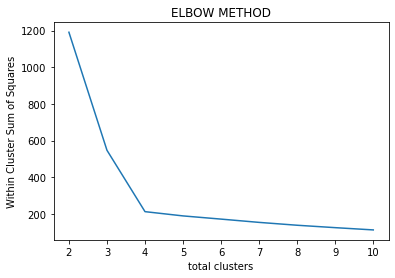

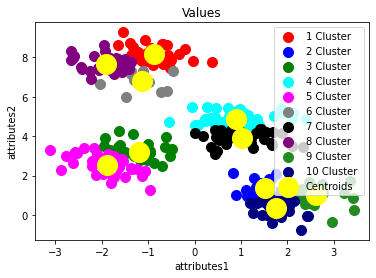

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans



data = pd.read_csv('dataset.csv')
df = data.iloc[:,[1,2]].values

from sklearn.cluster import KMeans
clustsum =[]

for x in range(2,11):
    k_means = KMeans(n_clusters=x,init='k-means++')
    k_means.fit(df)
    clustsum.append(k_means.inertia_)
    A = k_means.fit_predict(df)

    
    
    
plt.plot(range(2,11),clustsum)   ## elbow plot
plt.title('ELBOW METHOD') 
plt.xlabel('total clusters') 
plt.ylabel('Within Cluster Sum of Squares') 
plt.show()



## cluster plots

plt.scatter(df[A == 0, 0], df[A == 0, 1], s = 100, c = 'red', label = '1 Cluster')
plt.scatter(df[A == 1, 0], df[A == 1, 1], s = 100, c = 'blue', label = '2 Cluster ')
plt.scatter(df[A == 2, 0], df[A == 2, 1], s = 100, c = 'green', label = '3 Cluster ')
plt.scatter(df[A == 3, 0], df[A == 3, 1], s = 100, c = 'cyan', label = '4 Cluster ')
plt.scatter(df[A == 4, 0], df[A == 4, 1], s = 100, c = 'magenta', label = '5 Cluster ')


plt.scatter(df[A == 5, 0], df[A == 5, 1], s = 100, c = 'gray', label = '6 Cluster')
plt.scatter(df[A == 6, 0], df[A == 6, 1], s = 100, c = 'black', label = '7 Cluster ')
plt.scatter(df[A == 7, 0], df[A == 7, 1], s = 100, c = 'purple', label = '8 Cluster ')
plt.scatter(df[A == 8, 0], df[A == 8, 1], s = 100, c = 'forestgreen', label = '9 Cluster ')
plt.scatter(df[A == 9, 0], df[A == 9, 1], s = 100, c = 'navy', label = '10 Cluster ')



plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], s = 400, c = 'yellow', label = 'Centroids')
plt.title('Values')
plt.xlabel('attributes1')
plt.ylabel('attributes2')
plt.legend()
plt.show()

CONCLUSION: From the plots, k=4  is the most appropriate for this dataset.